In [9]:
from manrs.models import Base, Report, Result
import config
from sqlalchemy.orm import sessionmaker
from sqlalchemy import or_, func
import numpy as np
import pandas as pd
import seaborn as sns
from dateutil.relativedelta import relativedelta
from datetime import datetime
%matplotlib inline

In [2]:
Session = sessionmaker(config.DB_ENGINE)
session = Session()
month = relativedelta(months=1)

In [5]:
# get a list of ASNs with non-zero metrics
naughty_asns = session.query(Result.asn).filter(or_(v != 0 for v in (Result.m1, Result.m1c,
                                                                     Result.m2c, Result.m3))).all()
naughty_asns = [i[0] for i in naughty_asns]

In [6]:
query = session.query(Report.period_start,
                      Result.asn,
                      Result.m2c,
                      Result.m3).filter(Result.report_id.in_([16, 17, 18, 19]),
                                                             Result.asn.in_(naughty_asns),
                                                             Report.id == Result.report_id
                                                            )

In [7]:
df = pd.read_sql(query.statement, query.session.bind, index_col=['period_start', 'asn'])

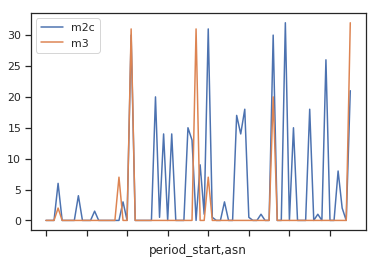

In [10]:
sns.set(style="ticks")
_ = df.plot()

In [ ]:
session.commit()